<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/CustomerSentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/UBL/Consumer_Complaints.csv")
data2 = pd.read_csv("/content/drive/MyDrive/UBL/consumer_complaints.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data1.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer Complaint', 'Company Public Response', 'Company', 'State',
       'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Date Sent to Company', 'Company Response to Consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Unnamed: 18'],
      dtype='object')

In [ ]:
data1.rename(columns = {'Date received' : 'date_received','Product':'product','Sub-product':'sub_product','Issue':'issue','Sub-issue':'sub_issue','Consumer Complaint':'consumer_complaint_narrative','Company Public Response':'company_public_response','Company':'company','State':'state','ZIP code':'zipcode','Tags':'tags','Consumer consent provided?':'consumer_consent_provided','Submitted via':'submitted_via','Date Sent to Company':'date_sent_to_company','Company Response to Consumer':'company_response_to_consumer','Timely response?':'timely_response','Consumer disputed?':'consumer_disputed','Complaint ID':'complaint_id'}, inplace = True)

In [ ]:
data1.drop(['Unnamed: 18'], axis=1, inplace = True)

In [ ]:
data2.rename(columns = {'consumer_disputed?':'consumer_disputed'}, inplace = True)

In [ ]:
data1.shape  # data from kaggle

(1025010, 18)

In [ ]:
data2.shape    #datafromUBL

(555957, 18)

In [ ]:
data =pd.concat([data1,data2])

In [ ]:
data.shape

(1580967, 18)

In [ ]:
#data.to_csv('combined_data.csv')

In [ ]:
# data = pd.read_csv('combined_customer_sentiments.csv')

# Data Pre-Processing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580967 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   date_received                 1580967 non-null  object
 1   product                       1580967 non-null  object
 2   sub_product                   1187475 non-null  object
 3   issue                         1580967 non-null  object
 4   sub_issue                     741475 non-null   object
 5   consumer_complaint_narrative  344620 non-null   object
 6   company_public_response       403488 non-null   object
 7   company                       1580967 non-null  object
 8   state                         1563720 non-null  object
 9   zipcode                       1559744 non-null  object
 10  tags                          219547 non-null   object
 11  consumer_consent_provided     615369 non-null   object
 12  submitted_via                 1580967 non-n

In [ ]:
data.shape

(1580967, 18)

In [ ]:
data.isnull().any().sum() # 10 features have null values

10

In [ ]:
data.isnull().sum()  # since consumer_consent_provided and consumer_complaint_narrative mostly have null values but we have imp feature aS WELL

date_received                         0
product                               0
sub_product                      393492
issue                                 0
sub_issue                        839492
consumer_complaint_narrative    1236347
company_public_response         1177479
company                               0
state                             17247
zipcode                           21223
tags                            1361420
consumer_consent_provided        965598
submitted_via                         0
date_sent_to_company                  0
company_response_to_consumer          3
timely_response                       0
consumer_disputed                256456
complaint_id                          0
dtype: int64

In [ ]:
missing_val = data.isnull().sum() 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

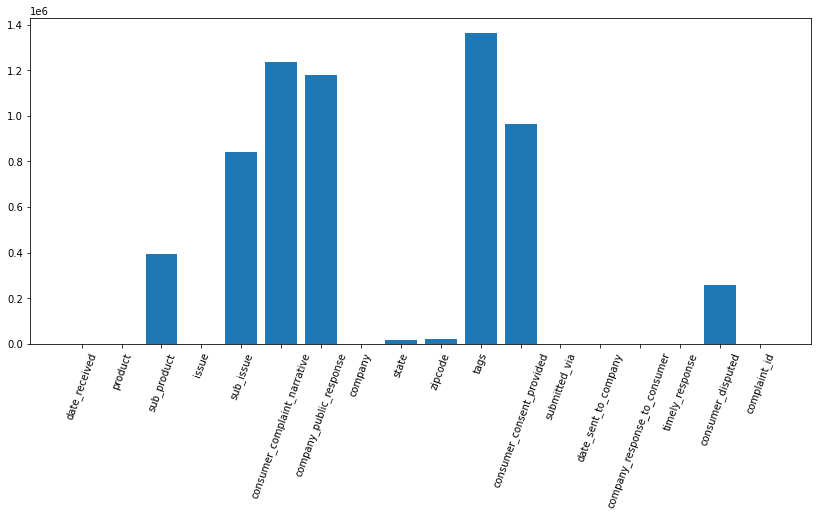

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(missing_val.index,missing_val.values)    # ploting missing values 
plt.xticks(rotation=70)

In [ ]:
data.shape

(1580967, 18)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# since sub_issue and tags have higher null values. we will replace them by using median or mean after label encoding

#### Converting Categorical Values into Numeric using label encoding or defined method

In [ ]:
cat_fea = [i for i in data.columns if data[i].dtype == "O"]
cat_fea   # Finding final categorical features that is need to be turned into Numericals Encoding means numerical values 

['date_received',
 'product',
 'sub_product',
 'issue',
 'sub_issue',
 'consumer_complaint_narrative',
 'company_public_response',
 'company',
 'state',
 'zipcode',
 'tags',
 'consumer_consent_provided',
 'submitted_via',
 'date_sent_to_company',
 'company_response_to_consumer',
 'timely_response',
 'consumer_disputed']

In [ ]:
new_data = data[data['consumer_complaint_narrative'].notna()]

In [ ]:
# remove NaN values from sub_issue, tags, state, zipcode, timely_response, complaint_id, consumer_disputed?
new_data["consumer_disputed"] = new_data["consumer_disputed"].fillna(new_data["consumer_disputed"].mode()[0])
new_data["complaint_id"]= new_data["complaint_id"].fillna(new_data["complaint_id"].mode()[0])
new_data["timely_response"]= new_data["timely_response"].fillna(new_data["timely_response"].mode()[0])
new_data["zipcode"]= new_data["zipcode"].fillna(new_data["zipcode"].mode()[0])
new_data["state"]= new_data["state"].fillna(new_data["state"].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#new_data.corrwith(new_data["product"])

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344620 entries, 1 to 553096
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 344620 non-null  object
 1   product                       344620 non-null  object
 2   sub_product                   271982 non-null  object
 3   issue                         344620 non-null  object
 4   sub_issue                     211806 non-null  object
 5   consumer_complaint_narrative  344620 non-null  object
 6   company_public_response       168099 non-null  object
 7   company                       344620 non-null  object
 8   state                         344620 non-null  object
 9   zipcode                       344620 non-null  object
 10  tags                          58955 non-null   object
 11  consumer_consent_provided     344620 non-null  object
 12  submitted_via                 344620 non-null  object
 13 

In [ ]:
for i  in cat_fea:
  count = len(new_data[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

# hence the unqiue value in  date column is very large, Thus
# Cardinality of Data is high which poses several problem to the model in terms of efficiency 
# because we need to do numerical encoding or create dummies 

The Cardinality of each column date_received : 1289 
The Cardinality of each column product : 18 
The Cardinality of each column sub_product : 76 
The Cardinality of each column issue : 161 
The Cardinality of each column sub_issue : 222 
The Cardinality of each column consumer_complaint_narrative : 333606 
The Cardinality of each column company_public_response : 11 
The Cardinality of each column company : 4226 
The Cardinality of each column state : 62 
The Cardinality of each column zipcode : 947 
The Cardinality of each column tags : 4 
The Cardinality of each column consumer_consent_provided : 1 
The Cardinality of each column submitted_via : 1 
The Cardinality of each column date_sent_to_company : 1289 
The Cardinality of each column company_response_to_consumer : 7 
The Cardinality of each column timely_response : 2 
The Cardinality of each column consumer_disputed : 2 


In [ ]:
new_data.shape

(344620, 18)

## Applying NLP on customer complaint

In [ ]:
!pip install neattext

     |████████████████████████████████| 114 kB 5.2 MB/s 


In [ ]:
#lets apply NLP
import neattext.functions as nfx

In [ ]:
# to clean the text
import neattext.functions as nfx
dir(nfx)
pd.set_option('display.max_rows', new_data.shape[0]+1)
Edited_Review = new_data['consumer_complaint_narrative'].copy()
new_data['clean_text'] = Edited_Review
new_data['clean_text'] = new_data['consumer_complaint_narrative'].apply(str).apply(nfx.fix_contractions)
new_data['clean_text'] = new_data['consumer_complaint_narrative'].apply(str).apply(nfx.remove_hashtags)
new_data['clean_text'] = new_data['clean_text'].apply(lambda x: nfx.remove_userhandles(x))
new_data['clean_text'] = new_data['clean_text'].apply(nfx.remove_multiple_spaces)
new_data['clean_text'] = new_data['clean_text'].apply(nfx.remove_urls)
new_data['clean_text'] = new_data['clean_text'].apply(nfx.remove_stopwords)
new_data['clean_text'] = new_data['clean_text'].apply(nfx.remove_special_characters)
new_data['clean_text'] = new_data['clean_text'].apply(nfx.remove_puncts)
new_data['clean_text'] = new_data['clean_text'].apply(nfx.remove_html_tags)
new_data['clean_text'] = new_data['clean_text'].apply(nfx.remove_numbers)
new_data['clean_text'] = new_data['clean_text'].apply(nfx.remove_shortwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
# since our clean_text is our customer reviews after tokenization 

In [ ]:
cat_fea = [i for i in new_data.columns if new_data[i].dtype == "O"]
cat_fea 

['date_received',
 'product',
 'sub_product',
 'issue',
 'sub_issue',
 'consumer_complaint_narrative',
 'company_public_response',
 'company',
 'state',
 'zipcode',
 'tags',
 'consumer_consent_provided',
 'submitted_via',
 'date_sent_to_company',
 'company_response_to_consumer',
 'timely_response',
 'consumer_disputed',
 'clean_text']

In [ ]:
for i  in cat_fea:
  count = len(new_data[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

The Cardinality of each column date_received : 1289 
The Cardinality of each column product : 18 
The Cardinality of each column sub_product : 76 
The Cardinality of each column issue : 161 
The Cardinality of each column sub_issue : 222 
The Cardinality of each column consumer_complaint_narrative : 333606 
The Cardinality of each column company_public_response : 11 
The Cardinality of each column company : 4226 
The Cardinality of each column state : 62 
The Cardinality of each column zipcode : 947 
The Cardinality of each column tags : 4 
The Cardinality of each column consumer_consent_provided : 1 
The Cardinality of each column submitted_via : 1 
The Cardinality of each column date_sent_to_company : 1289 
The Cardinality of each column company_response_to_consumer : 7 
The Cardinality of each column timely_response : 2 
The Cardinality of each column consumer_disputed : 2 
The Cardinality of each column clean_text : 266442 


In [ ]:
new_data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,clean_text
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,outdated information credit report previously ...
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,purchased XXXX XXXX dealer called Citizens Ban...
7,06/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,Company chooses not to provide a public response,Experian Information Solutions Inc.,VA,224XX,NaN,Consent provided,Web,06/15/2015,Closed with explanation,Yes,No,1420702,account credit report mistaken date mailed deb...
12,02-03-2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,NaN,"The CBE Group, Inc.",TX,752XX,NaN,Consent provided,Web,02-03-2016,Closed with explanation,Yes,Yes,1772196,company refuses provide verification validatio...
16,02/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,Company has responded to the consumer and the ...,SQUARETWO FINANCIAL CORPORATION,NE,693XX,NaN,Consent provided,Web,03-04-2016,Closed with explanation,Yes,Yes,1790634,complaint regards Square Financial Refer CFPB ...


In [ ]:
# remove NaN values from sub_issue, tags, state, zipcode, timely_response, complaint_id, consumer_disputed?
new_data["consumer_disputed"] = new_data["consumer_disputed"].fillna(new_data["consumer_disputed"].mode()[0])
new_data["complaint_id"]= new_data["complaint_id"].fillna(new_data["complaint_id"].mode()[0])
new_data["timely_response"]= new_data["timely_response"].fillna(new_data["timely_response"].mode()[0])
new_data["zipcode"]= new_data["zipcode"].fillna(new_data["zipcode"].mode()[0])
new_data["state"]= new_data["state"].fillna(new_data["state"].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
new_data['date_received'] = new_data['date_received'].astype('datetime64[ns]')
new_data['date_sent_to_company'] = new_data['date_sent_to_company'].astype('datetime64[ns]')
new_data['nb_days'] = ((new_data.date_sent_to_company - new_data.date_received)/np.timedelta64(1, 'D'))
new_data['nb_days'] = new_data['nb_days'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#new_data.drop(['consumer_complaint_narrative','zipcode','date_received','date_sent_to_company','complaint_id'], axis=1, inplace = True)
new_data.drop(['complaint_id'], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# this part can be removed , only try to analyze the correlation between the features
# since issue has 74 unique values lets classify them as pos, neg, or neutral
def parse_values(x):
    if x < 0:
        return 'negative'
    elif x == 0:
        return 'neutral'
    else:
        return 'positive'
sid = SentimentIntensityAnalyzer()
new_data['clean_text'].isnull().sum()
new_data['scores'] = new_data['issue'].apply(
    lambda review: sid.polarity_scores(review))
new_data['compound'] = new_data['scores'].apply(lambda score_dict: score_dict['compound'])
new_data['sentiments'] = new_data['compound'].apply(parse_values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
new_data.drop(['scores','compound'], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_data.drop(['date_received','consumer_complaint_narrative','zipcode','date_sent_to_company'], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_data.head()

,product,sub_product,issue,sub_issue,company_public_response,company,state,tags,consumer_consent_provided,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,clean_text,nb_days,sentiments
1,Credit reporting,NaN,Incorrect information on credit report,Account status,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,NaN,Consent provided,Web,Closed with explanation,Yes,No,outdated information credit report previously ...,4,positive
2,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,Older American,Consent provided,Web,Closed with explanation,Yes,No,purchased XXXX XXXX dealer called Citizens Ban...,3,neutral
7,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,Company chooses not to provide a public response,Experian Information Solutions Inc.,VA,NaN,Consent provided,Web,Closed with explanation,Yes,No,account credit report mistaken date mailed deb...,0,positive
12,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,"The CBE Group, Inc.",TX,NaN,Consent provided,Web,Closed with explanation,Yes,Yes,company refuses provide verification validatio...,0,negative
16,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,Company has responded to the consumer and the ...,SQUARETWO FINANCIAL CORPORATION,NE,NaN,Consent provided,Web,Closed with explanation,Yes,Yes,complaint regards Square Financial Refer CFPB ...,16,positive


In [ ]:
# we use label encoder to encode categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
object_col = new_data.select_dtypes("object").columns
for col in object_col:
    new_data[col]=le.fit_transform(new_data[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
new_data.dtypes

product                         int64
sub_product                     int64
issue                           int64
sub_issue                       int64
company_public_response         int64
company                         int64
state                           int64
tags                            int64
consumer_consent_provided       int64
submitted_via                   int64
company_response_to_consumer    int64
timely_response                 int64
consumer_disputed               int64
clean_text                      int64
nb_days                         int64
sentiments                      int64
dtype: object

In [ ]:
new_data.head()

,product,sub_product,issue,sub_issue,company_public_response,company,state,tags,consumer_consent_provided,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,clean_text,nb_days,sentiments
1,5,75,72,3,9,3744,3,3,0,0,1,1,0,204381,4,2
2,2,73,88,221,10,722,46,0,0,0,1,1,0,214089,3,1
7,5,75,46,93,7,1423,55,3,0,0,1,1,0,114566,0,2
12,7,47,53,116,10,3783,53,3,0,0,1,1,1,140404,0,0
16,7,11,68,191,9,3435,37,3,0,0,1,1,1,142979,16,2


Outliers

In [ ]:
# Checking Numerical Features in dataset and counting it 

num_features = [columns_name for columns_name in new_data.columns if new_data[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))


Number of Numerical Features we have in data is : 16  
Here is the Listed Numerical features ['product', 'sub_product', 'issue', 'sub_issue', 'company_public_response', 'company', 'state', 'tags', 'consumer_consent_provided', 'submitted_via', 'company_response_to_consumer', 'timely_response', 'consumer_disputed', 'clean_text', 'nb_days', 'sentiments'] 


In [ ]:
# # to scale the value
# from sklearn.preprocessing import StandardScaler 
# cols = ['product', 'sub_product', 'issue', 'sub_issue', 'company_public_response', 'company', 'state', 'tags', 'consumer_consent_provided', 'submitted_via', 'company_response_to_consumer', 'timely_response', 'consumer_disputed', 'clean_text', 'nb_days']
# sc=StandardScaler()
# for col in cols:
# #     new_data[col]=sc.fit_transform(new_data[col].values.reshape(-1,1))
# new_data.head()

# Find Coorelation

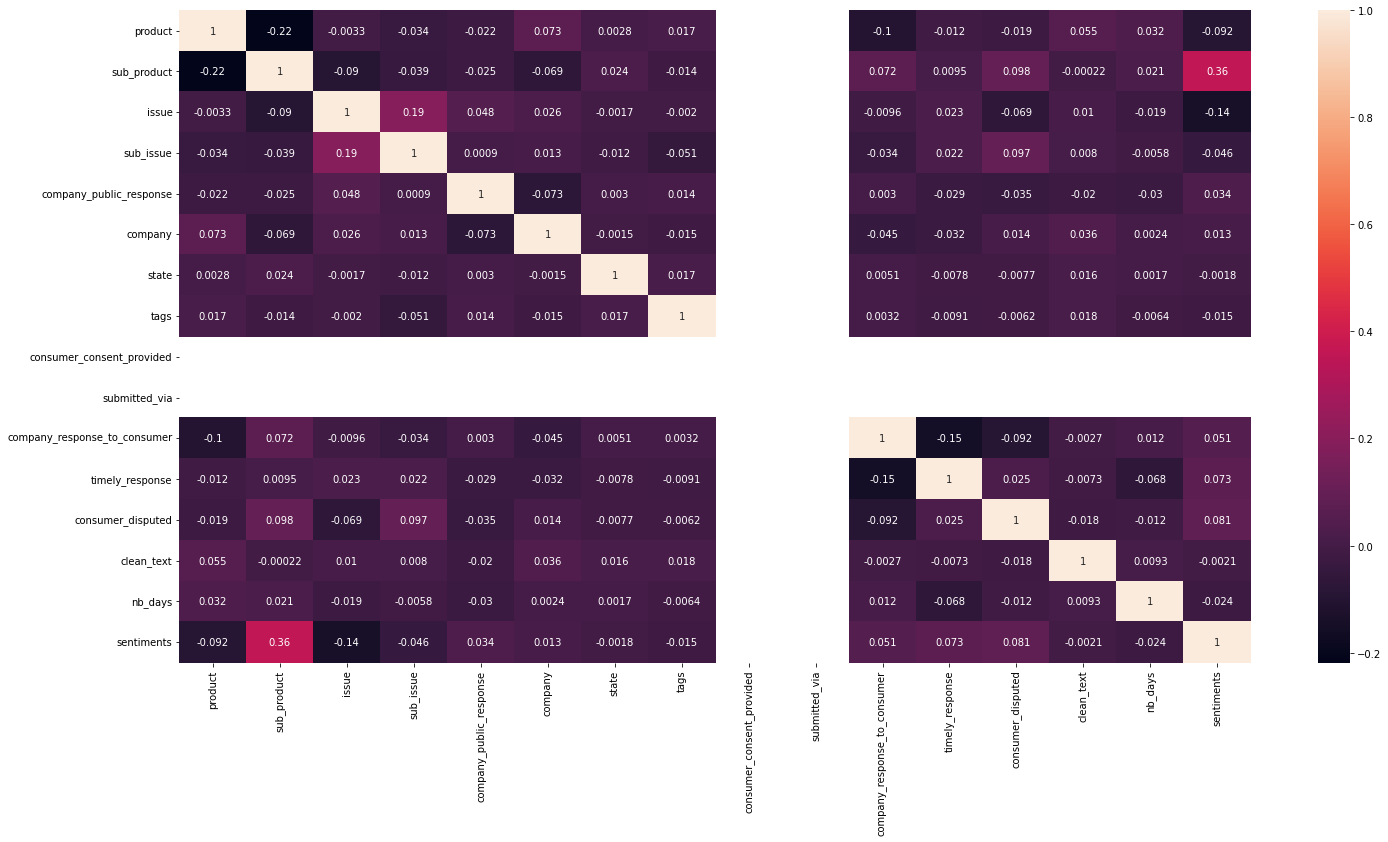

In [ ]:
plt.figure(figsize =(24,12))
sns.heatmap(new_data.corr(), annot = True)


# Data Visualization

## Univariate Analysis

In [ ]:
data["product"].value_counts()

Mortgage                                                                        440640
Debt collection                                                                 297264
Credit reporting                                                                232287
Credit card                                                                     155659
Bank account or service                                                         148769
Credit reporting, credit repair services, or other personal consumer reports    110756
Student loan                                                                     58808
Consumer Loan                                                                    52596
Credit card or prepaid card                                                      22913
Checking or savings account                                                      18982
Payday loan                                                                       9423
Money transfers                            

In [ ]:
new_data['product'].unique()

array([ 5,  2,  7, 10,  3, 11,  0, 15,  9, 12, 14,  8,  6,  1, 16,  4, 17,
       13])

In [ ]:
new_data=new_data.drop_duplicates()

In [ ]:
# yes =(new_data.consumer_disputed.value_counts()[0]/data.shape[0])*100
# no =(data.consumer_disputed.value_counts()[1]/data.shape[0])*100
# print(yes)
# print(no)

In [ ]:
# plt.figure(figsize=(8,6)) # data is biased, maybe it will overfit on training
# sns.countplot(data=data, x = "consumer_disputed")
# print("people who has been disputed:", yes)
# print("people who has not been disputed:", no)

## Bivariate Analysis

In [ ]:
#sns.lineplot(data= new_data,x="clean_text",y="product",color = "green")

In [ ]:
# sns.lineplot(data= new_data,x="clean_text",y="consumer_disputed",color = "green") 
# sentiments 1 - neutral , 2 - positive , 0 -negative
# we can see as long as the customer sentiments are positive the rate of customer disputed is also decrease

In [ ]:
#sns.lineplot(data= data,x="nb_days",y="consumer_disputed",color = "red")

In [ ]:
x = new_data.drop("product", axis = 1)
y = new_data["product"]

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE()
# x,y=smote.fit_resample(x,y)

# print(x.shape,y.shape)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


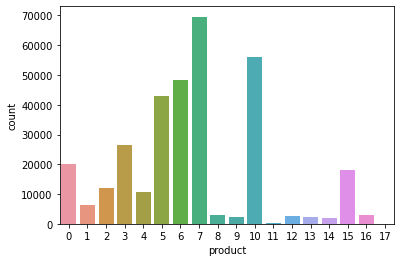

In [ ]:
sns.countplot(y)

In [ ]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(x, y)

In [ ]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

ValueError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)       # model training 

In [ ]:


y_pred = classifier_logreg.predict(x_test)
y_pred 

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))   # model accuracy 

### Lets try another algorithms (otherwise we will consider our removed column too )

In [ ]:
def evaluate(model):
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    
    print('model name ',model)
    print('accuracy ',accuracy)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    evaluate(model)

In [ ]:
## since random forest gives us the highest accuracy

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=0.9, colsample_bytree=0.5, gamma=0,
              grow_policy='lossguide', learning_rate=0.4, max_bin=512,
              max_delta_step=0, max_depth=8, min_child_weight=0.8, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=9,
              objective='binary:hinge', random_state=0, reg_alpha=2,
              reg_lambda=3, sampling_method='uniform', scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8, tree_method='hist',
              verbosity=1)

xgb.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier     # initilize 
classifier = RandomForestClassifier(max_samples=0.9, satisfy = y)
classifier.fit(x_train,y_train)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred 

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))   # accuracy 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

In [ ]:
from sklearn import metrics
pred = xgb.predict(x_test)
print('acc',accuracy_score(y_test,pred))
print('c_R',classification_report(y_test,pred))
print('matrix',confusion_matrix(y_test,pred))